In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 32.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
ESD = "/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/"
# Run one example

import os
dir_list = os.listdir(ESD)
dir_list[0:5]
dir_list.remove('.DS_Store')
dir_list.sort()
dir_list = dir_list[:10]
dir_list

['0001',
 '0002',
 '0003',
 '0004',
 '0005',
 '0006',
 '0007',
 '0008',
 '0009',
 '0010']

In [ ]:
# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for directory in dir_list:
    dir_path = os.path.join(ESD, directory)
    sub_dir = os.listdir(dir_path)
    sub_dir.remove('.DS_Store')
    for dir in sub_dir:
        if dir.endswith(".txt"):
            continue
        directory_path = os.path.join(dir_path, dir)
        if os.path.isdir(directory_path):
            for filename in os.listdir(directory_path):
                # print(filename)
                if filename.endswith(".wav"):
                    # print(dir)
                    # print(filename)
                    # Extract the emotion abbreviation from the filename
                    emo_abb = filename.split('_')[1].split('.')[0][-2:]
                    # print(type(int(emo_abb)))
                    if (21 <= int(emo_abb) <= 50):
                        # Get the emotion name from the emotion_map dictionary
                        emotion = dir
                        # Full path to the audio file
                        file_path = os.path.join(directory_path, filename)
                        # Append the emotion and file path to the data list
                        data.append([emotion, file_path])

    #             break
    # break

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [ ]:
df.head(5)

,emotion,path
0,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
1,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
2,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
3,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
4,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...


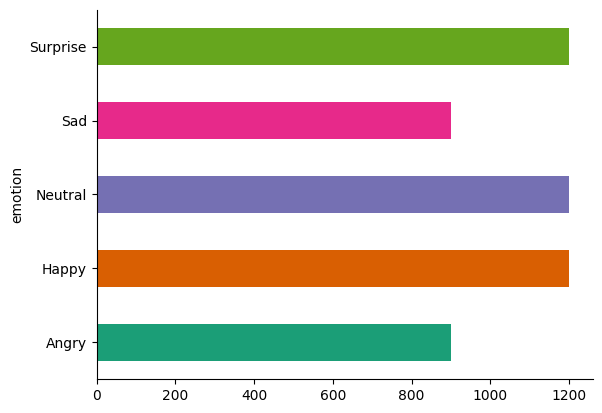

In [ ]:
# @title emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
csv_path='/content/drive/MyDrive/Dataset/metadata/Data_path.csv"'
df.to_csv(csv_path, index=False)

In [ ]:
ref = pd.read_csv(csv_path)
ref.head(5)

,emotion,path
0,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
1,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
2,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
3,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...
4,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Em...


In [ ]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
5184,Sad,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0010/Sad/0010_001134.wav
5095,Happy,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0010/Happy/0010_000837.wav
1592,Happy,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0003/Happy/0003_000931.wav
3278,Happy,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0007/Happy/0007_001025.wav
3413,Sad,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0007/Sad/0007_001344.wav
...,...,...
145,Sad,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Sad/0001_001225.wav
4691,Neutral,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0009/Neutral/0009_000026.wav
2880,Neutral,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0006/Neutral/0006_000022.wav
3331,Happy,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0007/Happy/0007_000724.wav


<Axes: ylabel='count'>

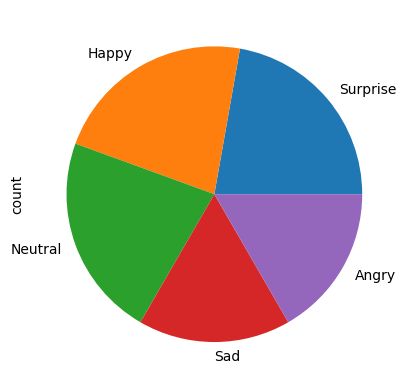

In [ ]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.3 MB/s eta 0:00:00


In [ ]:
import resampy
from resampy import resample
import librosa

In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

5400


,Features
0,"[-17.65651512145996, -17.466327667236328, -17.033588409423828, -17.536096572875977, -18.397510528564453, -18.55176544189453, -16.256093978881836, -14.705270767211914, -17.57172203063965, -18.749990463256836, -19.572704315185547, -20.967533111572266, -21.022445678710938, -19.880407333374023, -19.9384822845459, -20.753625869750977, -20.133136749267578, -20.462875366210938, -20.891891479492188, -20.044387817382812, -17.664081573486328, -16.296791076660156, -15.446859359741211, -13.297686576843262, -14.070673942565918, -15.829768180847168, -13.706393241882324, -12.451516151428223, -14.652752876281738, -16.90481185913086, -16.998872756958008, -15.579521179199219, -16.06891441345215, -16.481882095336914, -16.88092613220215, -16.29457664489746, -16.557165145874023, -17.677064895629883, -18.432336807250977, -18.400781631469727, -18.358028411865234, -18.65170669555664, -20.1015567779541, -21.222211837768555, -20.19696044921875, -19.125200271606445, -18.641887664794922, -19.014305114746094, -19.99225616455078, -22.06875228881836, -21.832653045654297, -20.163358688354492, -20.669660568237305, -20.22927474975586, -23.092683792114258, -23.704858779907227, -21.758359909057617, -19.470367431640625, -18.14645767211914, -17.811813354492188, -19.901439666748047, -14.976644515991211, -8.49296760559082, -6.321734428405762, -5.830480575561523, -7.037820339202881, -6.289422988891602, -6.055155277252197, -8.701791763305664, -10.442588806152344, -9.975224494934082, -11.488557815551758, -11.883259773254395, -13.087141036987305, -15.704228401184082, -16.65304946899414, -16.884441375732422, -16.965665817260742, -14.160261154174805, -9.219233512878418, -8.35764217376709, -10.551102638244629, -14.521754264831543, -16.822208404541016, -17.893579483032227, -20.824499130249023, -21.481395721435547, -20.07521629333496, -20.550111770629883, -20.155750274658203, -18.027446746826172, -19.435169219970703, -19.999561309814453, -18.75522232055664, -18.21108055114746, -18.125349044799805, -18.21615219116211, -19.30709457397461, -20.83257293701172, -20.051015853881836, ...]"
1,"[-17.329557418823242, -18.09170150756836, -16.985742568969727, -16.067012786865234, -15.94593334197998, -18.02077865600586, -18.14748191833496, -19.96814727783203, -22.497304916381836, -22.18814468383789, -21.152629852294922, -22.31929588317871, -21.531391143798828, -19.33620834350586, -19.587085723876953, -19.964366912841797, -19.024011611938477, -18.5846004486084, -18.975685119628906, -18.310684204101562, -17.218189239501953, -16.761600494384766, -15.51036262512207, -15.963491439819336, -16.968311309814453, -17.728519439697266, -16.82479476928711, -15.722333908081055, -16.136417388916016, -17.00632095336914, -18.453601837158203, -17.981847763061523, -17.51521873474121, -18.56192398071289, -19.1307373046875, -15.81103801727295, -15.359115600585938, -16.117412567138672, -15.471857070922852, -14.981058120727539, -15.64881706237793, -16.484352111816406, -16.433841705322266, -17.60674476623535, -18.456439971923828, -18.47584342956543, -17.277759552001953, -17.02651596069336, -18.42510986328125, -18.234874725341797, -15.972414016723633, -11.336999893188477, -10.0748929977417, -12.222176551818848, -13.543678283691406, -13.87360954284668, -13.042317390441895, -12.784713745117188, -14.54223918914795, -15.77692985534668, -17.299861907958984, -17.675901412963867, -17.5502986907959, -18.072500228881836, -17.690481185913086, -17.777278900146484, -19.74692153930664, -19.439655303955078, -18.955629348754883, -17.443378448486328, -17.75390625, -18.616657257080078, -18.609745025634766, -19.405208587646484, -20.836626052856445, -21.25884246826172, -19.769460678100586, -19.959501266479492, -20.4128360748291, -19.028850555419922, -18.182111740112305, -17.960493087768555, -18.797327041625977, -19.07033348083496, -17.050579071044922, -16.716249465942383, -17.225143432617188, -17.88385772705078, -17.881425857543945, -20.088756561279297, -19.08394432067871, -19.05173683166504, -18.034488677978516, -18.

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001448.wav,-17.656515,-17.466328,-17.033588,-17.536097,-18.397511,-18.551765,-16.256094,-14.705271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001649.wav,-17.329557,-18.091702,-16.985743,-16.067013,-15.945933,-18.020779,-18.147482,-19.968147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001529.wav,-17.712917,-19.212399,-22.477245,-21.379002,-21.251934,-22.312330,-19.400438,-12.694309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001729.wav,-11.228547,-14.120562,-20.082298,-18.634937,-19.803820,-20.175228,-19.876219,-19.160067,...,0.403919,0.363108,0.36964,0.401827,0.502472,0.571884,0.558143,0.595071,0.607296,0.022414
4,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001528.wav,-13.699124,-16.509350,-19.932903,-18.610857,-18.930798,-18.364109,-17.984879,-18.503872,...,0.487432,0.423628,0.43820,0.514338,0.530748,0.484117,0.466898,0.493166,0.551654,0.023291


In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(5400, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001448.wav,-17.656515,-17.466328,-17.033588,-17.536097,-18.397511,-18.551765,-16.256094,-14.705271,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001649.wav,-17.329557,-18.091702,-16.985743,-16.067013,-15.945933,-18.020779,-18.147482,-19.968147,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001529.wav,-17.712917,-19.212399,-22.477245,-21.379002,-21.251934,-22.312330,-19.400438,-12.694309,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001729.wav,-11.228547,-14.120562,-20.082298,-18.634937,-19.803820,-20.175228,-19.876219,-19.160067,...,0.403919,0.363108,0.36964,0.401827,0.502472,0.571884,0.558143,0.595071,0.607296,0.022414
4,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001528.wav,-13.699124,-16.509350,-19.932903,-18.610857,-18.930798,-18.364109,-17.984879,-18.503872,...,0.487432,0.423628,0.43820,0.514338,0.530748,0.484117,0.466898,0.493166,0.551654,0.023291


In [ ]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
1361,-14.450645,-16.483393,-21.730240,-21.199224,-21.722626,-22.397329,-21.802479,-22.619717,-23.092045,-20.992855,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4335,-15.169004,-17.317823,-22.815201,-22.857853,-22.487022,-19.020834,-14.716838,-10.639021,-8.913671,-9.779894,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4304,-10.519073,-10.706678,-14.590032,-15.751065,-17.008595,-17.847021,-19.680447,-19.559202,-20.024099,-19.409500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2031,-7.163203,-8.026433,-12.410207,-11.366099,-11.382111,-10.462755,-10.121641,-10.700779,-10.253047,-10.220057,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
366,-9.707510,-10.480929,-14.551372,-15.389438,-16.089012,-16.783367,-18.845703,-21.150360,-22.176853,-19.214001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2416,-13.010425,-16.169491,-24.799910,-22.871826,-23.335510,-23.143398,-22.161198,-21.487352,-22.560638,-21.264050,...,0.463365,0.538132,0.516774,0.544288,0.700985,0.641903,0.430991,0.380316,0.381176,0.048299
1488,-17.131258,-19.965887,-25.131596,-24.521940,-25.255779,-25.344391,-25.819681,-26.532696,-26.382650,-27.029053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4187,-8.238303,-10.633992,-14.623569,-15.108133,-15.791354,-14.780704,-15.890001,-14.001872,-13.381790,-12.597591,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2955,-14.287137,-15.996965,-18.108849,-18.052250,-18.959272,-17.353844,-15.561605,-14.341185,-13.964624,-13.155749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
949,-18.658909,-18.949360,-17.307987,-16.016951,-16.425695,-16.724192,-14.739462,-14.462433,-14.070086,-13.345746,...,0.452570,0.508444,0.535621,0.542785,0.549325,0.544603,0.565452,0.621843,0.612442,0.035784


In [ ]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(4320, 531, 1)
(1080, 531, 1)


In [ ]:
lb.classes_

array(['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise'], dtype=object)

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

5400


,mel_spectrogram
0,"[-32.399593, -31.128757, -31.105516, -30.296284, -30.517185, -29.583075, -25.205196, -22.298471, -23.984144, -23.941013, -22.285187, -21.197016, -19.20719, -18.085325, -18.566713, -19.773989, -19.007288, -18.857668, -19.461878, -21.767887, -22.912441, -24.294125, -25.687056, -25.730381, -25.55127, -23.399847, -17.822878, -15.249743, -18.700953, -20.454447, -20.705606, -21.266457, -22.713583, -22.231691, -23.104877, -23.646994, -22.286156, -21.402193, -22.406084, -22.391556, -22.941513, -23.630442, -23.899775, -24.334631, -26.14471, -27.044044, -26.686192, -26.19253, -27.057379, -27.344746, -26.77808, -26.876148, -28.514877, -29.475142, -29.505714, -28.465364, -31.977203, -39.57046, -42.772514, -44.253345, -44.89921, -44.354263, -38.638134, -34.584927, -33.164227, -28.951612, -26.150204, -25.858196, -26.692802, -25.455145, -22.942015, -21.289875, -24.967766, -35.420776, -41.705795, -44.044308, -44.05215, -39.28637, -29.018568, -20.946396, -17.1594, -16.770834, -15.236506, -13.531458, -14.591834, -15.749439, -14.82255, -14.427676, -15.734606, -16.666924, -17.363342, -19.304903, -21.217085, -22.910643, -24.147264, -23.50598, -24.219156, -25.009394, -22.907135, -18.750471, ...]"
1,"[-37.79612, -32.637623, -30.310017, -31.133318, -34.209682, -32.00685, -28.01235, -27.621521, -28.924164, -25.996607, -23.809366, -22.937355, -21.336596, -19.66539, -19.918856, -19.176214, -16.713293, -16.810738, -19.554008, -21.575356, -22.308647, -24.59776, -25.725935, -26.300255, -27.65857, -27.18009, -23.754969, -19.882818, -19.03106, -20.711782, -22.923204, -24.679222, -25.879494, -27.242666, -28.000353, -28.151922, -29.601772, -30.995285, -33.211475, -31.95163, -31.469452, -30.378756, -29.132929, -28.56544, -29.005032, -30.506329, -34.745327, -41.87757, -47.715637, -49.085106, -40.683, -31.406096, -31.331362, -36.03776, -36.059467, -34.820427, -31.773973, -26.393816, -24.98751, -27.73193, -29.753113, -31.394936, -33.304764, -34.68015, -32.05633, -30.880154, -29.76064, -29.77456, -30.101006, -29.755402, -29.633797, -28.950108, -27.619394, -27.259035, -26.78938, -27.494244, -27.078373, -27.682602, -28.079742, -28.359823, -29.657536, -30.17425, -30.603327, -30.750782, -30.651037, -30.236559, -34.13477, -41.750134, -44.1465, -46.79072, -48.82706, -49.839344, -40.941265, -39.1677, -43.24802, -40.012604, -39.185604, -41.15101, -40.12853, -36.991295, ...]"
2,"[-45.258846, -47.90064, -50.6957, -51.530334, -52.09909, -52.909573, -45.290512, -36.696384, -35.306576, -36.2837, -36.059193, -36.433178, -36.30017, -35.68161, -35.760693, -34.393867, -32.561024, -30.562912, -29.372986, -27.159536, -27.26685, -27.811226, -25.978144, -24.866096, -24.64147, -24.434101, -24.433336, -26.269548, -27.341911, -28.456648, -28.989815, -28.82514, -28.024097, -26.684895, -25.228464, -26.289387, -26.485088, -26.481928, -27.202656, -28.295797, -28.405008, -30.273432, -31.799791, -32.66114, -35.243523, -38.193855, -39.081406, -39.085896, -38.760258, -39.038776, -39.695396, -39.91722, -38.706787, -36.111187, -31.832815, -27.53806, -26.60974, -26.187727, -26.893642, -26.551165, -25.819906, -26.008345, -26.87643, -27.785004, -28.500416, -30.036125, -30.360903, -30.898249, -31.963566, -32.7156, -33.591805, -33.62335, -33.877678, -33.80732, -33.535553, -32.5851, -30.952894, -29.827545, -29.258976, -29.154715, -29.06235, -28.05875, -27.834162, -29.454145, -34.540615, -36.281727, -37.291462, -39.115597, -40.95703, -44.624138, -46.5902, -49.649754, -52.24459, -52.967125, -53.04143, -53.36522, -53.50721, -53.346004, -53.298565, -53.522884, ...]"
3,"[-17.78015, -21.265266, -30.167435, -31.725756, -33.27375, -33.74868, -34.20556, -33.557457, -32.966724, -33.907154, -34.669415, -34.15355, -33.769413, -33.87342, -33.060917, -31.987652, -31.425425, -30.686716, -31.865623, -33.546432, -33.62283, -31.111984, -29.520802, -30.651567, -32.318134, -32.16012, -32.079006, -31.378513, -32.35998, -32.81585, -32.15814, -32.33829, -32.65072, -32.58965, -32.030785, -31.749722, -31.9988

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001448.wav,-32.399593,-31.128757,-31.105516,-30.296284,-30.517185,-29.583075,-25.205196,-22.298471,...,-46.542313,-46.576546,-46.564560,-46.544956,-46.599445,NaN,NaN,NaN,NaN,NaN
1,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001649.wav,-37.796120,-32.637623,-30.310017,-31.133318,-34.209682,-32.006851,-28.012350,-27.621521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001529.wav,-45.258846,-47.900639,-50.695702,-51.530334,-52.099091,-52.909573,-45.290512,-36.696384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001729.wav,-17.780149,-21.265266,-30.167435,-31.725756,-33.273750,-33.748680,-34.205559,-33.557457,...,-38.152618,-38.189796,-37.452408,-35.940483,-34.463665,-34.480083,-34.534695,-34.942135,-30.559551,-23.724148
4,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001528.wav,-21.154730,-22.764450,-28.682173,-28.442144,-29.202221,-28.925196,-29.184464,-30.965948,...,-56.146873,-55.984360,-55.989532,-56.076248,-56.160572,-55.936787,-56.038933,-56.082581,-55.961990,-55.047592


In [ ]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
1361,-29.438576,-28.322758,-29.349880,-28.908352,-29.395262,-28.715889,-27.747791,-28.416357,-29.223488,-25.923088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4335,-28.286686,-27.784859,-32.166946,-35.180347,-36.142540,-36.910336,-37.383045,-37.263165,-36.972092,-37.501831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4304,-33.531116,-30.128618,-33.230377,-36.078072,-37.127110,-38.417294,-39.679535,-39.699776,-40.055313,-40.190861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2031,-15.809762,-16.733547,-21.436529,-19.912601,-15.760786,-13.254813,-13.663560,-14.014320,-14.274252,-15.022780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,-17.103905,-19.923828,-29.487837,-29.271666,-27.762564,-26.255949,-24.884048,-22.990723,-22.442688,-24.300510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2416,-28.395395,-30.815329,-29.475180,-18.821829,-14.429561,-13.517749,-14.950973,-15.963766,-15.070710,-13.581210,...,-29.603554,-32.434307,-33.933475,-36.179977,-39.766365,-43.228477,-45.680672,-47.449688,-48.745277,-48.470985
1488,-21.702450,-21.828142,-20.931110,-19.903843,-19.472244,-19.294910,-19.870338,-20.925449,-21.002407,-19.554504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4187,-21.812124,-20.436022,-16.791592,-15.201634,-15.234701,-16.238642,-19.469852,-22.065073,-23.878107,-22.913612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,-12.835679,-10.532531,-12.060133,-13.540596,-15.583011,-16.769308,-16.480352,-16.478725,-17.222458,-15.945776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949,-41.248005,-38.118877,-36.019054,-33.976906,-32.327332,-32.008976,-24.328571,-20.677689,-21.474112,-21.683128,...,-26.963579,-29.132750,-31.429680,-33.393364,-35.934528,-37.605762,-37.552422,-36.412399,-33.912121,-30.161596


In [ ]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(4320, 259, 1)
(1080, 259, 1)


In [ ]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001448.wav,-32.399593,-31.128757,-31.105516,-30.296284,-30.517185,-29.583075,-25.205196,-22.298471,...,-46.542313,-46.576546,-46.564560,-46.544956,-46.599445,NaN,NaN,NaN,NaN,NaN
1,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001649.wav,-37.796120,-32.637623,-30.310017,-31.133318,-34.209682,-32.006851,-28.012350,-27.621521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001529.wav,-45.258846,-47.900639,-50.695702,-51.530334,-52.099091,-52.909573,-45.290512,-36.696384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001729.wav,-17.780149,-21.265266,-30.167435,-31.725756,-33.273750,-33.748680,-34.205559,-33.557457,...,-38.152618,-38.189796,-37.452408,-35.940483,-34.463665,-34.480083,-34.534695,-34.942135,-30.559551,-23.724148
4,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001528.wav,-21.154730,-22.764450,-28.682173,-28.442144,-29.202221,-28.925196,-29.184464,-30.965948,...,-56.146873,-55.984360,-55.989532,-56.076248,-56.160572,-55.936787,-56.038933,-56.082581,-55.961990,-55.047592


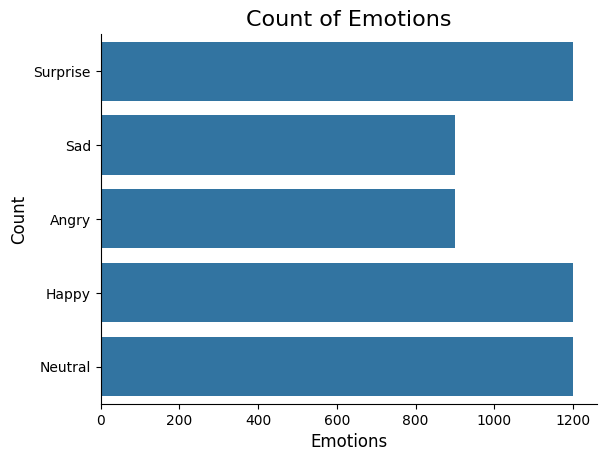

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.path.shape

(16200, 16200, (5400,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.103005,0.456153,0.401007,0.422635,0.362032,0.350398,0.326292,0.340078,0.386233,0.505825,...,1.201589e-07,1.134536e-07,1.086140e-07,1.049741e-07,1.022583e-07,1.003381e-07,9.895194e-08,9.808527e-08,9.754118e-08,Surprise
1,0.249263,0.542941,0.545748,0.542355,0.526017,0.526236,0.450903,0.454855,0.529248,0.632412,...,1.438474e-02,1.413146e-02,1.481477e-02,1.433055e-02,1.445767e-02,1.421543e-02,1.447702e-02,1.475533e-02,1.483538e-02,Surprise
2,0.108482,0.405562,0.361677,0.410218,0.360871,0.336321,0.284027,0.310313,0.363402,0.506629,...,1.105788e-07,1.016578e-07,9.514111e-08,9.013063e-08,8.638539e-08,8.373978e-08,8.227010e-08,6.620461e-08,2.556260e-08,Surprise
3,0.072162,0.501251,0.391070,0.330095,0.269971,0.321726,0.420765,0.403988,0.407774,0.398577,...,3.397505e-07,3.137443e-07,2.953955e-07,2.817949e-07,2.716980e-07,2.644473e-07,2.591823e-07,2.557741e-07,2.536704e-07,Surprise
4,0.144816,0.595796,0.493558,0.427962,0.382012,0.384187,0.461529,0.446681,0.425222,0.419971,...,7.001199e-04,7.085002e-04,7.080392e-04,6.801813e-04,7.336142e-04,7.217511e-04,6.603046e-04,6.736358e-04,7.260268e-04,Surprise


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(12960, 155, 1)
(3240, 155, 1)


(16200, 5)

In [ ]:
lb.classes_

array(['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise'], dtype=object)

In [ ]:
#Accuarte class labels

In [ ]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001448.wav,-32.399593,-31.128757,-31.105516,-30.296284,-30.517185,-29.583075,-25.205196,-22.298471,...,-46.542313,-46.576546,-46.564560,-46.544956,-46.599445,NaN,NaN,NaN,NaN,NaN
1,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001649.wav,-37.796120,-32.637623,-30.310017,-31.133318,-34.209682,-32.006851,-28.012350,-27.621521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001529.wav,-45.258846,-47.900639,-50.695702,-51.530334,-52.099091,-52.909573,-45.290512,-36.696384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001729.wav,-17.780149,-21.265266,-30.167435,-31.725756,-33.273750,-33.748680,-34.205559,-33.557457,...,-38.152618,-38.189796,-37.452408,-35.940483,-34.463665,-34.480083,-34.534695,-34.942135,-30.559551,-23.724148
4,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001528.wav,-21.154730,-22.764450,-28.682173,-28.442144,-29.202221,-28.925196,-29.184464,-30.965948,...,-56.146873,-55.984360,-55.989532,-56.076248,-56.160572,-55.936787,-56.038933,-56.082581,-55.961990,-55.047592
5,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001449.wav,-17.310020,-19.468775,-25.513845,-28.863365,-35.955372,-38.380676,-30.076328,-25.361404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001728.wav,-36.062912,-34.401550,-32.506798,-31.369068,-30.823561,-29.906357,-29.973356,-30.698851,...,-48.364826,-48.362228,-48.380409,-48.401035,-48.429688,-48.402069,-48.530064,-48.447243,-48.351368,-48.407547
7,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001648.wav,-38.245525,-43.225925,-50.677437,-52.005424,-39.876099,-29.056416,-28.725647,-34.769924,...,-51.762341,-52.365189,-53.416531,-54.310173,-54.483253,-54.444851,-54.440010,-54.475147,-54.322166,-52.912556
8,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001738.wav,-33.855907,-37.037312,-41.423424,-42.631622,-43.303398,-42.735378,-40.549614,-37.810471,...,-21.447132,-14.872170,-14.651193,-15.727903,-15.738114,-16.583748,-17.711935,-16.625782,-13.034158,-9.246767
9,Surprise,/content/drive/MyDrive/Dataset/Datasets/ESD/Emotion Speech Dataset/0001/Surprise/0001_001539.wav,-11.443503,-14.030742,-20.986406,-21.480871,-21.556082,-22.332722,-24.113749,-32.464066,...,-37.203884,-40.432068,-42.603928,-45.469231,-48.201504,-50.861320,-53.344933,-54.432392,-55.002983,-53.919552


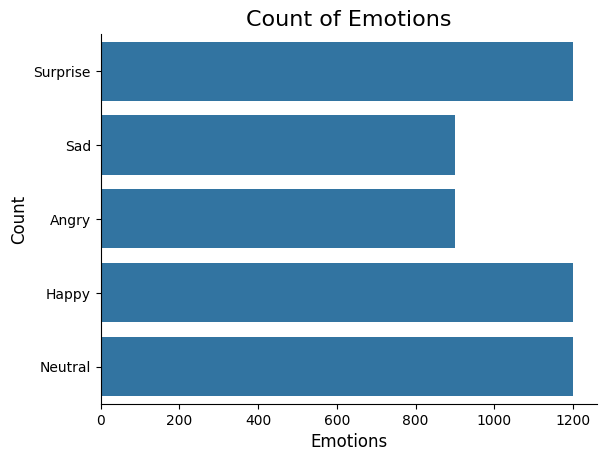

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [ ]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.path.shape

(21600, 21600, (5400,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.103005,0.456153,0.401007,0.422635,0.362032,0.350398,0.326292,0.340078,0.386233,0.505825,...,1.201589e-07,1.134536e-07,1.086140e-07,1.049741e-07,1.022583e-07,1.003381e-07,9.895194e-08,9.808527e-08,9.754118e-08,Surprise
1,0.228696,0.522527,0.512828,0.517458,0.482366,0.485380,0.423524,0.419126,0.474306,0.595834,...,5.384614e-03,5.220694e-03,5.143438e-03,5.315867e-03,5.152200e-03,5.329843e-03,5.302627e-03,5.416233e-03,5.124193e-03,Surprise
2,0.108482,0.405562,0.361677,0.410218,0.360871,0.336321,0.284027,0.310313,0.363402,0.506629,...,1.105788e-07,1.016578e-07,9.514111e-08,9.013063e-08,8.638539e-08,8.373978e-08,8.227010e-08,6.620461e-08,2.556260e-08,Surprise
3,0.109592,0.467845,0.352737,0.397524,0.390277,0.351288,0.305011,0.308055,0.346244,0.470474,...,1.101984e-07,1.017267e-07,9.562058e-08,9.095697e-08,8.744268e-08,8.510629e-08,8.409184e-08,6.800299e-08,2.685703e-08,Surprise
4,0.072162,0.501251,0.391070,0.330095,0.269971,0.321726,0.420765,0.403988,0.407774,0.398577,...,3.397505e-07,3.137443e-07,2.953955e-07,2.817949e-07,2.716980e-07,2.644473e-07,2.591823e-07,2.557741e-07,2.536704e-07,Surprise


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
(17280, 155, 1)
(4320, 155, 1)


(21600, 5)

In [ ]:
lb.classes_

array(['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise'], dtype=object)

In [ ]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model1-emo-db.weights.h5')
model2 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model2-emo-db.weights.h5')
model3 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step
Accuracy Score for model1 =  0.1372685185185185
Accuracy Score for model2 =  0.1284722222222222
Accuracy Score for model3 =  0.15416666666666667
Accuracy Score for average ensemble =  0.1337962962962963
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step
Weighted average method
Accuracy Score for model1 =  0.1372685185185185
Accuracy Score for model2 =  0.1284722222222222
Accuracy Score for model3 =  0.15416666666666667
Accuracy Score for average ensemble =  0.1337962962962963
Accuracy Score for weighted average ensemble =  0.13958333333333334
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step
135/135 ━━━━━━━━━━

ValueError: Shape of passed values is (7, 7), indices imply (5, 5)

In [ ]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()